Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')

In [10]:
df = pd.DataFrame(data)

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [16]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [20]:
df.shape

(400, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [28]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [30]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state=42)

In [36]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8375

In [38]:
ypred = model.predict(xtest)

In [40]:
accuracy = accuracy_score(ytest,ypred)
error = 1 - accuracy
recall = recall_score(ytest , ypred)
precision = precision_score(ytest , ypred)
cm = confusion_matrix(ytest,ypred)

In [42]:
tn , fp , fn , tp = cm.ravel()

In [46]:
print(f"Accuracy : {accuracy}")
print(f"Recall : {recall}")
print(f"Precision : {precision}")
print(f"cm : {cm}")

Accuracy : 0.8875
Recall : 0.75
Precision : 0.9130434782608695
cm : [[50  2]
 [ 7 21]]


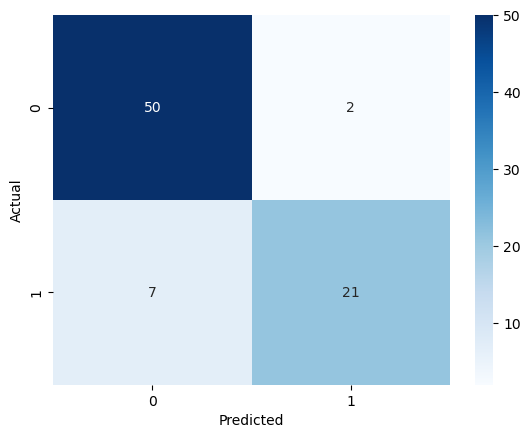

In [62]:
sns.heatmap(cm,annot=True,cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()